In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('C:/Users/RVALENZUELA/Desktop/RVC 2020/RENE/X/MK Digital/LETS UP GRADE/Datasets/IrisDataset.csv')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred = classifier.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9736842105263158


In [24]:
from sklearn.metrics import classification_report
print('The Classification report is as follows...\n')
print(classification_report(y_test, y_pred))

The Classification report is as follows...

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [29]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df


,Real Values,Predicted Values
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,virginica,virginica
4,setosa,setosa
5,virginica,virginica
6,setosa,setosa
7,versicolor,versicolor
8,versicolor,versicolor
9,versicolor,versicolor


[Text(133.92000000000002, 195.696, 'X[3] <= -0.542\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 0.549\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 0.111\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 0.677\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(234.36, 65.232, 'X[3] <= 0.549\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsa

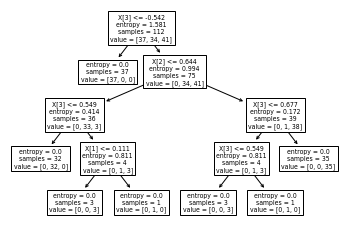

In [39]:
from sklearn import tree 
tree.plot_tree(classifier)

In [42]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= -0.54
|   |--- class: setosa
|--- feature_3 >  -0.54
|   |--- feature_2 <= 0.64
|   |   |--- feature_3 <= 0.55
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  0.55
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: versicolor
|   |--- feature_2 >  0.64
|   |   |--- feature_3 <= 0.68
|   |   |   |--- feature_3 <= 0.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  0.55
|   |   |   |   |--- class: versicolor
|   |   |--- feature_3 >  0.68
|   |   |   |--- class: virginica

